# ML_FOR_DNS_ANALYSIS

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Read the dataset
data = pd.read_csv(r'E:\BenignAndMaliciousDataset.csv')
df=data

In [3]:
df.head()

,Domain,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,Ip,DomainInAlexaDB,CommonPorts,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,4455,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,4456,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,4457,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,4458,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,4459,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1


In [4]:
df.shape

(90000, 34)

In [5]:
# Column list
column_names = df.columns.tolist()
print(column_names)

['Domain', 'DNSRecordType', 'MXDnsResponse', 'TXTDnsResponse', 'HasSPFInfo', 'HasDkimInfo', 'HasDmarcInfo', 'Ip', 'DomainInAlexaDB', 'CommonPorts', 'CountryCode', 'RegisteredCountry', 'CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 'RegisteredOrg', 'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 'TLD', 'IpReputation', 'DomainReputation', 'ConsoantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsoantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']


In [6]:
# unique values of the column
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique values for column '{column_name}':")
    print(unique_values)

Unique values for column 'Domain':
[ 4455  4456  4457 ... 71235 82994 64601]
Unique values for column 'DNSRecordType':
['A' 'CNAME' 'MX']
Unique values for column 'MXDnsResponse':
[False  True]
Unique values for column 'TXTDnsResponse':
[False  True]
Unique values for column 'HasSPFInfo':
[False  True]
Unique values for column 'HasDkimInfo':
[False  True]
Unique values for column 'HasDmarcInfo':
[False  True]
Unique values for column 'Ip':
[16984 11562  6808 ...  5512 11187  7723]
Unique values for column 'DomainInAlexaDB':
[False  True]
Unique values for column 'CommonPorts':
[False  True]
Unique values for column 'CountryCode':
[nan 'US' 'DE' 'KY' 'RU' 'JP' 'PL' 'IT' 'CZ' 'GB' 'ES' 'NL' 'IE' 'LT' 'CA'
 'KR' 'BE' 'FR' 'BR' 'SG' 'RS' 'HU' 'DK' 'BG' 'VG' 'TR' 'AU' 'AR' 'MY'
 'HK' 'CN' 'IL' 'ZA' 'ID' 'IR' 'RO' 'BA' 'BD' 'TH' 'CH' 'UA' 'AT' 'LU'
 'SK' 'IN' 'EE' 'MX' 'GR' 'MN' 'CL' 'FI' 'KG' 'SC' 'CO' 'VN' 'SE' 'PT'
 'SI' 'KE' 'NO' 'PK' 'CR' 'TW' 'LV' 'AE' 'CY' 'GE' 'KZ' 'NG' 'PS' 'CW'
 'B

In [7]:
df.nunique(axis=0)

Domain                 90000
DNSRecordType              3
MXDnsResponse              2
TXTDnsResponse             2
HasSPFInfo                 2
HasDkimInfo                2
HasDmarcInfo               2
Ip                     16985
DomainInAlexaDB            2
CommonPorts                2
CountryCode              108
RegisteredCountry        113
CreationDate               5
LastUpdateDate             5
ASN                     1976
HttpResponseCode           4
RegisteredOrg           4377
SubdomainNumber          207
Entropy                    6
EntropyOfSubDomains        4
StrangeCharacters         47
TLD                      756
IpReputation               2
DomainReputation           2
ConsoantRatio             11
NumericRatio               9
SpecialCharRatio          10
VowelRatio                 9
ConsoantSequence          25
VowelSequence              8
NumericSequence           26
SpecialCharSequence        9
DomainLength             150
Class                      2
dtype: int64

In [8]:
df.dtypes

Domain                   int64
DNSRecordType           object
MXDnsResponse             bool
TXTDnsResponse            bool
HasSPFInfo                bool
HasDkimInfo               bool
HasDmarcInfo              bool
Ip                       int64
DomainInAlexaDB           bool
CommonPorts               bool
CountryCode             object
RegisteredCountry       object
CreationDate             int64
LastUpdateDate           int64
ASN                      int64
HttpResponseCode         int64
RegisteredOrg           object
SubdomainNumber          int64
Entropy                  int64
EntropyOfSubDomains      int64
StrangeCharacters        int64
TLD                     object
IpReputation              bool
DomainReputation          bool
ConsoantRatio          float64
NumericRatio           float64
SpecialCharRatio       float64
VowelRatio             float64
ConsoantSequence         int64
VowelSequence            int64
NumericSequence          int64
SpecialCharSequence      int64
DomainLe

In [9]:
# Check for null values in each column
null_values_in_columns = df.isnull().sum()
null_values_in_columns

Domain                     0
DNSRecordType              0
MXDnsResponse              0
TXTDnsResponse             0
HasSPFInfo                 0
HasDkimInfo                0
HasDmarcInfo               0
Ip                         0
DomainInAlexaDB            0
CommonPorts                0
CountryCode            29052
RegisteredCountry      77774
CreationDate               0
LastUpdateDate             0
ASN                        0
HttpResponseCode           0
RegisteredOrg          35391
SubdomainNumber            0
Entropy                    0
EntropyOfSubDomains        0
StrangeCharacters          0
TLD                      170
IpReputation               0
DomainReputation           0
ConsoantRatio              0
NumericRatio               0
SpecialCharRatio           0
VowelRatio                 0
ConsoantSequence           0
VowelSequence              0
NumericSequence            0
SpecialCharSequence        0
DomainLength               0
Class                      0
dtype: int64

### Columns such as CountryCode, RegisteredCountry, TLD, and RegisteredOrg have missing values, possibly indicating that this data was not available or not recorded for certain entries.
### The presence of null values in these columns suggests that any analysis or modeling involving these features may need to account for missing data, either through imputation techniques or exclusion of records with missing values, depending on the specific requirements of the analysis or task at hand.

In [10]:
# Get data types of each column
column_types = df.dtypes

# Separate categorical and numerical columns
categorical_columns = column_types[column_types == 'object'].index.tolist()
numerical_columns = column_types[column_types != 'object'].index.tolist()

In [11]:
categorical_columns

['DNSRecordType', 'CountryCode', 'RegisteredCountry', 'RegisteredOrg', 'TLD']

In [12]:
numerical_columns

['Domain',
 'MXDnsResponse',
 'TXTDnsResponse',
 'HasSPFInfo',
 'HasDkimInfo',
 'HasDmarcInfo',
 'Ip',
 'DomainInAlexaDB',
 'CommonPorts',
 'CreationDate',
 'LastUpdateDate',
 'ASN',
 'HttpResponseCode',
 'SubdomainNumber',
 'Entropy',
 'EntropyOfSubDomains',
 'StrangeCharacters',
 'IpReputation',
 'DomainReputation',
 'ConsoantRatio',
 'NumericRatio',
 'SpecialCharRatio',
 'VowelRatio',
 'ConsoantSequence',
 'VowelSequence',
 'NumericSequence',
 'SpecialCharSequence',
 'DomainLength',
 'Class']

In [13]:
df=df.drop(["Domain","Ip"],axis=1)

### The dropped columns contain information such as domain names and IP addresses, which might not be relevant for the specific analysis being conducted.
### Any further analysis or modeling performed on the DataFrame df will no longer consider the dropped columns. 

In [14]:
df.head()

,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,DomainInAlexaDB,CommonPorts,CountryCode,RegisteredCountry,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,A,False,False,False,False,False,False,False,NaN,NaN,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,A,False,False,False,False,False,False,False,NaN,NaN,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,A,False,False,False,False,False,False,False,NaN,NaN,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,A,False,False,False,False,False,False,False,NaN,NaN,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,A,False,False,False,False,False,False,False,NaN,NaN,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1


In [15]:
df=df.drop(["CountryCode","RegisteredOrg","RegisteredCountry"],axis=1)

### The columns "CountryCode," "RegisteredOrg," and "RegisteredCountry" had a considerable number of null values: 29,052, 77,774, and 35,391 respectively as the dataset contains 90000 rows.
### These null values are now irrelevant since the corresponding columns have been removed from the DataFrame.
### The remaining columns in the DataFrame (df) continue to be free from null values, as indicated by the absence of null value counts for those columns in the updated (null_values_in_columns) output.

In [16]:
df.head()

,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,DomainInAlexaDB,CommonPorts,CreationDate,LastUpdateDate,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,A,False,False,False,False,False,False,False,0,0,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,A,False,False,False,False,False,False,False,0,0,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,A,False,False,False,False,False,False,False,0,0,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,A,False,False,False,False,False,False,False,0,0,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,A,False,False,False,False,False,False,False,0,0,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1


In [17]:
null_values_in_columns = df.isnull().sum()
null_values_in_columns

DNSRecordType            0
MXDnsResponse            0
TXTDnsResponse           0
HasSPFInfo               0
HasDkimInfo              0
HasDmarcInfo             0
DomainInAlexaDB          0
CommonPorts              0
CreationDate             0
LastUpdateDate           0
ASN                      0
HttpResponseCode         0
SubdomainNumber          0
Entropy                  0
EntropyOfSubDomains      0
StrangeCharacters        0
TLD                    170
IpReputation             0
DomainReputation         0
ConsoantRatio            0
NumericRatio             0
SpecialCharRatio         0
VowelRatio               0
ConsoantSequence         0
VowelSequence            0
NumericSequence          0
SpecialCharSequence      0
DomainLength             0
Class                    0
dtype: int64

In [18]:
df.shape

(90000, 29)

In [19]:
df.dropna(subset=['TLD'], inplace=True)

### As TLD has only 170 rows of null values when compared to the dataset that has 90000 rows so we only drop the row that has null values

In [20]:
df.shape

(89830, 29)

In [21]:
df.dtypes

DNSRecordType           object
MXDnsResponse             bool
TXTDnsResponse            bool
HasSPFInfo                bool
HasDkimInfo               bool
HasDmarcInfo              bool
DomainInAlexaDB           bool
CommonPorts               bool
CreationDate             int64
LastUpdateDate           int64
ASN                      int64
HttpResponseCode         int64
SubdomainNumber          int64
Entropy                  int64
EntropyOfSubDomains      int64
StrangeCharacters        int64
TLD                     object
IpReputation              bool
DomainReputation          bool
ConsoantRatio          float64
NumericRatio           float64
SpecialCharRatio       float64
VowelRatio             float64
ConsoantSequence         int64
VowelSequence            int64
NumericSequence          int64
SpecialCharSequence      int64
DomainLength             int64
Class                    int64
dtype: object

## Data Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

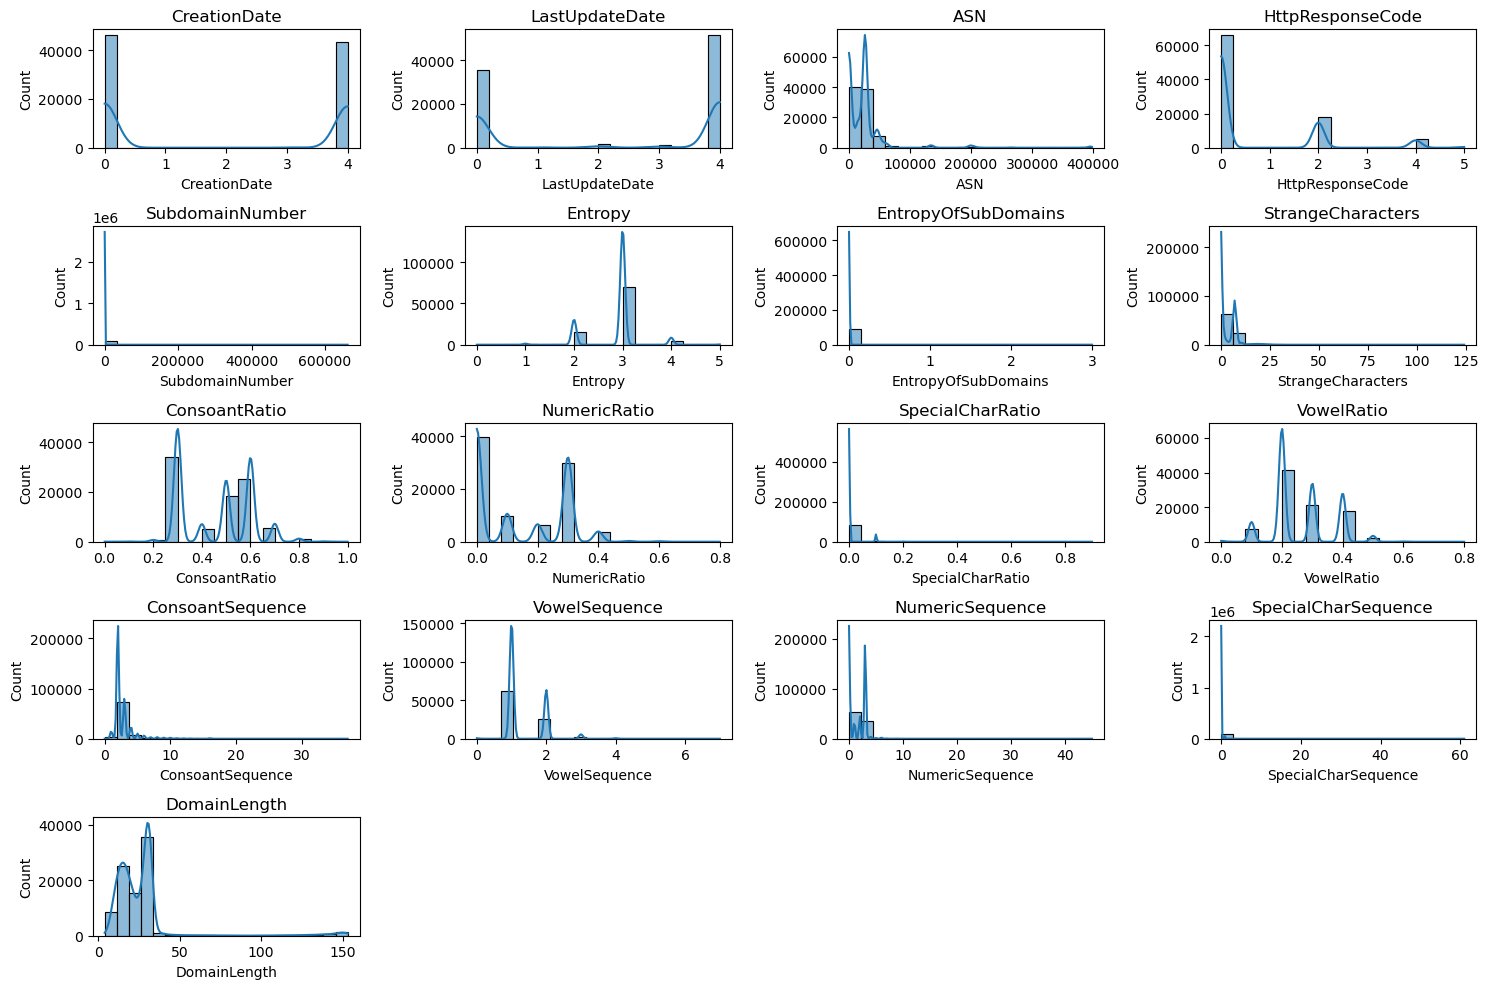

In [23]:
# Visualize the distribution of numerical variables
numeric_cols = ['CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 
                'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 
                'ConsoantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 
                'ConsoantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 
                'DomainLength']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

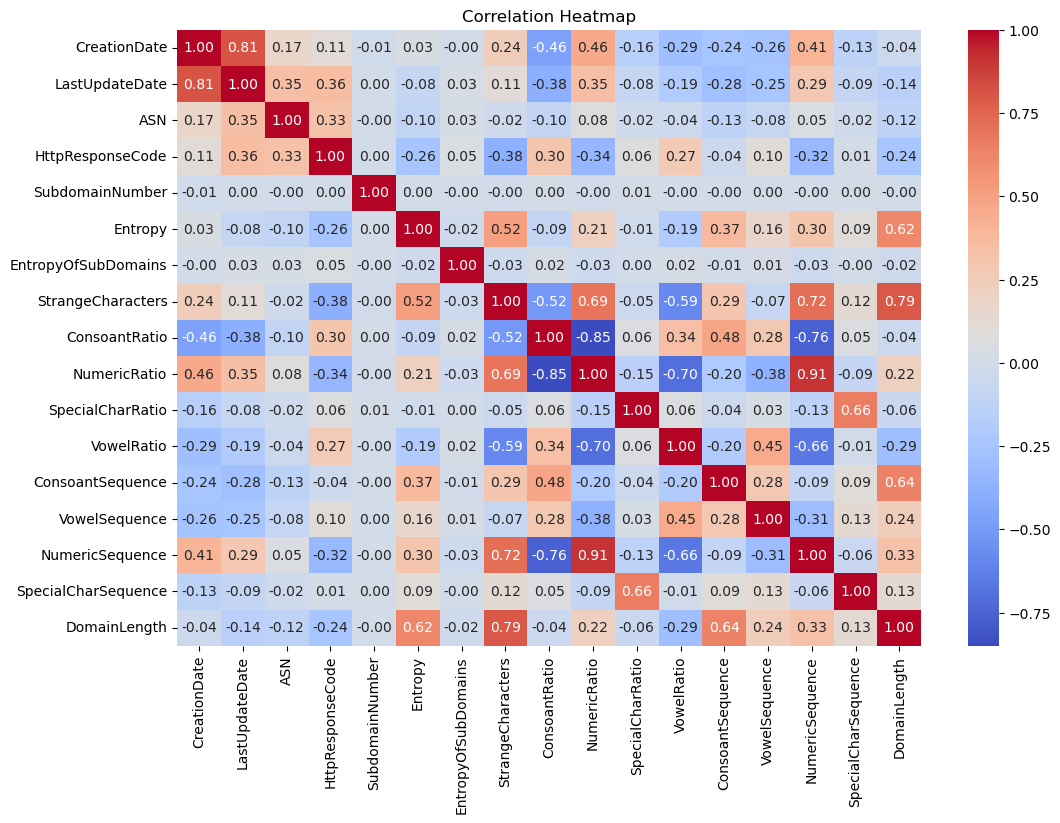

In [24]:
# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### There is a strong positive correlation between CreationDate and LastUpdateDate, which means that domains that were created recently are also updated recently.
### There is a strong negative correlation between VowelRatio and NumericRatio, which means that domains that have more vowels tend to have fewer numbers, and vice versa.
### There is a weak positive correlation between DomainLength and Entropy, which means that domains that are longer tend to have more randomness.
### There is a strong positive correlation between SpecialCharRatio and NumericRatio, which means that domains that have more special characters tend to have more numbers, and vice versa. This might indicate that these domains are more likely to be generated by algorithms or bots, rather than humans.
### There is a weak negative correlation between HTTPResponseCode and DomainLength, which means that domains that are longer tend to have lower HTTP response codes. This might indicate that as there are only small domains that are active with large domain length(can possible be DAG Domains).
### There is a weak positive correlation between SubdomainNumber and EntropyOfSubDomains, which means that domains that have more subdomains tend to have more randomness in their subdomains. This might indicate that these domains are more complex or dynamic, or that they are more likely to be used for malicious purposes.

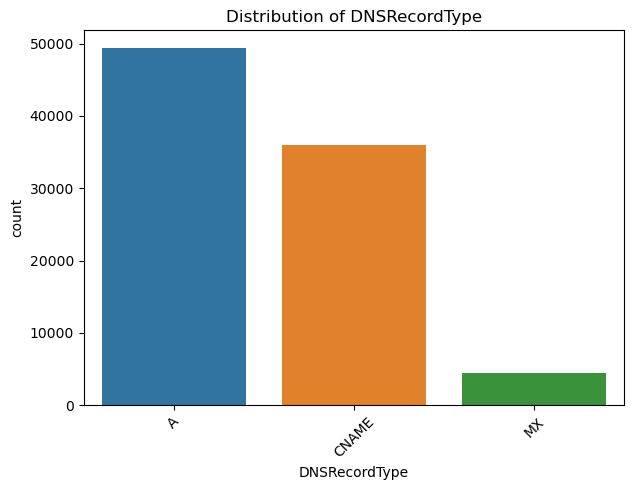

In [25]:
# Visualize the distribution of categorical variables
categorical_cols = ['DNSRecordType']

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### DNS Record Types: DNS stands for Domain Name System, which is a system that translates domain names into IP addresses. There are different types of DNS records that serve different purposes, such as ‘A’, ‘CNAME’, and ‘MX’.
### ‘A’ Type: The ‘A’ type is the most common DNS record type, which maps a domain name to an IPv4 address. For example, the ‘A’ record for example.com could be 93.184.216.34. The ‘A’ type is essential for connecting to websites and other online services.
### ‘CNAME’ Type: The ‘CNAME’ type is a DNS record type that maps a domain name to another domain name, which is usually an ‘A’ record. For example, the ‘CNAME’ record for www.example.com could be example.com. The ‘CNAME’ type is useful for creating aliases or subdomains for a domain.1
### ‘MX’ Type: The ‘MX’ type is a DNS record type that specifies the mail server that handles the email for a domain. For example, the ‘MX’ record for example.com could be mail.example.com. The ‘MX’ type is important for sending and receiving emails.
### Distribution: The bar graph shows that the ‘A’ type has the highest count, followed by ‘CNAME’, and ‘MX’ has the lowest count. This could indicate that the data set contains more domains that have direct IP addresses, than domains that have aliases or subdomains, or domains that have email services. This could also reflect the relative popularity or necessity of each DNS record type.

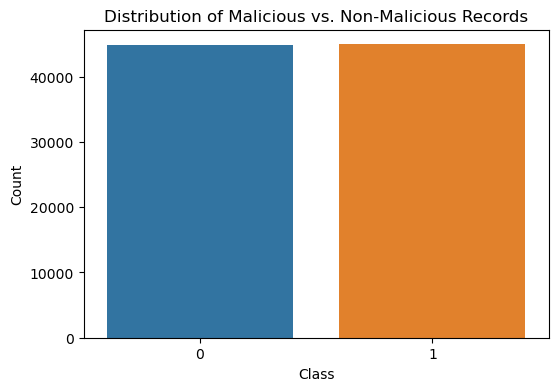

In [26]:
# Visualize the distribution of the target variable ('Class')
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Malicious vs. Non-Malicious Records')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Our Dataset contains equal no of Malicious and Non-malicious Domains

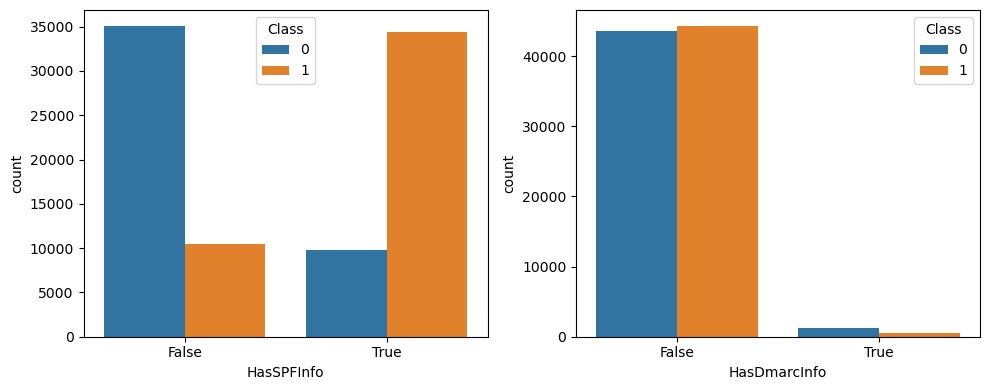

In [27]:
# Countplot for binary categorical variables
binary_categorical_columns = ["HasSPFInfo", "HasDmarcInfo"]
plt.figure(figsize=(10, 4))
for i, col in enumerate(binary_categorical_columns):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, hue="Class", data=df)
plt.tight_layout()
plt.show()

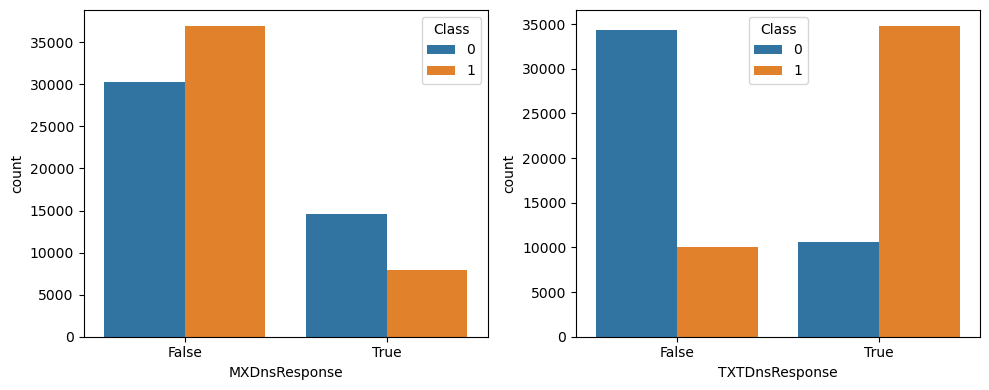

In [28]:
binary_categorical_columns = ["MXDnsResponse","TXTDnsResponse"]
plt.figure(figsize=(10, 4))
for i, col in enumerate(binary_categorical_columns):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, hue="Class", data=df)
plt.tight_layout()
plt.show()

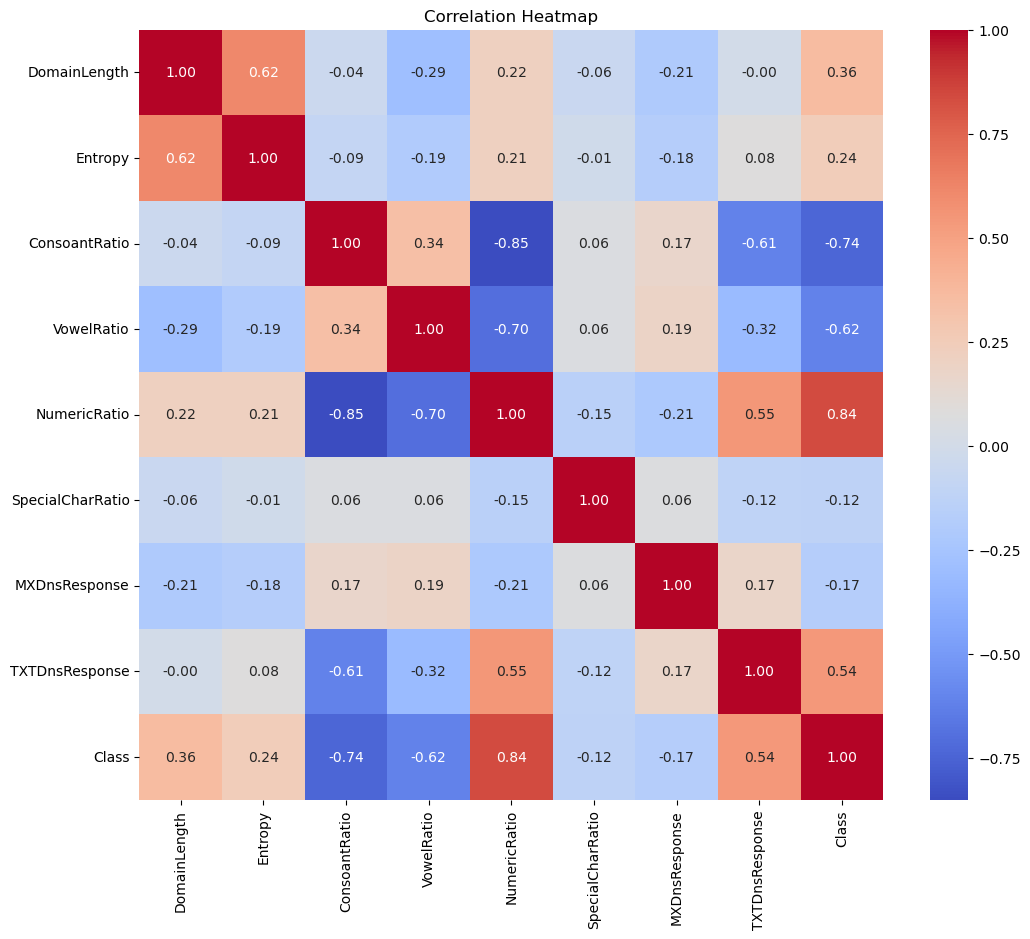

In [29]:
# Assuming df is your DataFrame
selected_columns = ["DomainLength", "Entropy", "ConsoantRatio", "VowelRatio", "NumericRatio", 
                     "SpecialCharRatio", "MXDnsResponse", "TXTDnsResponse", "Class"]

# Select the relevant columns from the DataFrame
df_selected = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
df.head

<bound method NDFrame.head of       DNSRecordType  MXDnsResponse  TXTDnsResponse  HasSPFInfo  HasDkimInfo  \
0                 A          False           False       False        False   
1                 A          False           False       False        False   
2                 A          False           False       False        False   
3                 A          False           False       False        False   
4                 A          False           False       False        False   
...             ...            ...             ...         ...          ...   
89995             A          False           False       False        False   
89996             A          False           False       False        False   
89997             A          False           False       False        False   
89998             A           True            True        True        False   
89999             A          False           False       False        False   

       HasDmarcInfo  

In [31]:
df.head()

,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,DomainInAlexaDB,CommonPorts,CreationDate,LastUpdateDate,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,A,False,False,False,False,False,False,False,0,0,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,A,False,False,False,False,False,False,False,0,0,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,A,False,False,False,False,False,False,False,0,0,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,A,False,False,False,False,False,False,False,0,0,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,A,False,False,False,False,False,False,False,0,0,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1


## Model Training

In [32]:
# Check for null values in each column
null_values_in_columns = df.isnull().sum()
null_values_in_columns

DNSRecordType          0
MXDnsResponse          0
TXTDnsResponse         0
HasSPFInfo             0
HasDkimInfo            0
HasDmarcInfo           0
DomainInAlexaDB        0
CommonPorts            0
CreationDate           0
LastUpdateDate         0
ASN                    0
HttpResponseCode       0
SubdomainNumber        0
Entropy                0
EntropyOfSubDomains    0
StrangeCharacters      0
TLD                    0
IpReputation           0
DomainReputation       0
ConsoantRatio          0
NumericRatio           0
SpecialCharRatio       0
VowelRatio             0
ConsoantSequence       0
VowelSequence          0
NumericSequence        0
SpecialCharSequence    0
DomainLength           0
Class                  0
dtype: int64

In [33]:
df=df.drop(columns=['TLD','ASN','DNSRecordType'])

In [34]:
df.dtypes

MXDnsResponse             bool
TXTDnsResponse            bool
HasSPFInfo                bool
HasDkimInfo               bool
HasDmarcInfo              bool
DomainInAlexaDB           bool
CommonPorts               bool
CreationDate             int64
LastUpdateDate           int64
HttpResponseCode         int64
SubdomainNumber          int64
Entropy                  int64
EntropyOfSubDomains      int64
StrangeCharacters        int64
IpReputation              bool
DomainReputation          bool
ConsoantRatio          float64
NumericRatio           float64
SpecialCharRatio       float64
VowelRatio             float64
ConsoantSequence         int64
VowelSequence            int64
NumericSequence          int64
SpecialCharSequence      int64
DomainLength             int64
Class                    int64
dtype: object

In [35]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Exclude non-numeric and irrelevant features
y = df['Class']

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train a Random Forest classifier to determine feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

In [40]:
feature_importances

MXDnsResponse          0.006314
TXTDnsResponse         0.013272
HasSPFInfo             0.020550
HasDkimInfo            0.000040
HasDmarcInfo           0.000820
DomainInAlexaDB        0.001796
CommonPorts            0.004156
CreationDate           0.016132
LastUpdateDate         0.022056
HttpResponseCode       0.012882
SubdomainNumber        0.047923
Entropy                0.008948
EntropyOfSubDomains    0.000142
StrangeCharacters      0.092652
IpReputation           0.001693
DomainReputation       0.000214
ConsoantRatio          0.123697
NumericRatio           0.202495
SpecialCharRatio       0.001988
VowelRatio             0.078579
ConsoantSequence       0.012719
VowelSequence          0.005112
NumericSequence        0.215280
SpecialCharSequence    0.002132
DomainLength           0.108409
dtype: float64

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

In [42]:
# Select top k features based on importance scores
k = 11  # You can adjust this parameter
selected_features = feature_importances.nlargest(k).index

In [43]:
selected_features

Index(['NumericSequence', 'NumericRatio', 'ConsoantRatio', 'DomainLength',
       'StrangeCharacters', 'VowelRatio', 'SubdomainNumber', 'LastUpdateDate',
       'HasSPFInfo', 'CreationDate', 'TXTDnsResponse'],
      dtype='object')

In [44]:
X_train[selected_features]

,NumericSequence,NumericRatio,ConsoantRatio,DomainLength,StrangeCharacters,VowelRatio,SubdomainNumber,LastUpdateDate,HasSPFInfo,CreationDate,TXTDnsResponse
81935,0,0.0,0.6,20,0,0.3,0,0,False,0,False
66051,3,0.3,0.3,30,6,0.2,57,4,True,4,True
61172,3,0.3,0.3,30,6,0.2,57,4,True,4,True
89049,2,0.2,0.6,132,18,0.1,0,0,False,0,False
9522,0,0.0,0.5,13,0,0.4,0,4,False,4,False
...,...,...,...,...,...,...,...,...,...,...,...
6267,3,0.3,0.3,31,7,0.2,57,4,True,4,True
54993,0,0.0,0.5,24,0,0.5,0,0,False,0,False
76987,0,0.0,0.6,24,0,0.3,0,0,False,0,False
860,0,0.0,0.6,13,0,0.2,0,4,False,4,False


In [45]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}


In [46]:
from tabulate import tabulate

# Initialize an empty list to store results
results = []

# Evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier with the final selected features
    clf.fit(X_train[selected_features], y_train)

    # Evaluate the model on the test set
    y_pred = clf.predict(X_test[selected_features])

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the list
    results.append([clf_name, accuracy, precision, recall, f1])

# Print results in tabular format
print(tabulate(results, headers=["Classifier", "Accuracy", "Precision", "Recall", "F1-score"]))


Classifier                Accuracy    Precision    Recall    F1-score
----------------------  ----------  -----------  --------  ----------
Random Forest             0.977457     0.976984  0.978174    0.977578
Support Vector Machine    0.850607     0.99026   0.709617    0.826772
Gradient Boosting         0.9764       0.976407  0.976623    0.976515
K-Nearest Neighbors       0.974897     0.974754  0.975294    0.975024
Decision Tree             0.974841     0.977394  0.972413    0.974897
Naive Bayes               0.909607     0.950682  0.864946    0.90579
AdaBoost                  0.969721     0.972061  0.967538    0.969795


## Hyper Parameter Tuning

In [47]:
# Define classifiers with hyperparameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]})
}

In [48]:
from sklearn.model_selection import GridSearchCV

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Iterate over classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train[selected_features], y_train)
    
    # Get the best parameters and store them in the dictionary
    best_params_dict[clf_name] = grid_search.best_params_

# Display the best parameters
best_params_dict


{'Random Forest': {'max_depth': 20, 'n_estimators': 150},
 'Gradient Boosting': {'learning_rate': 0.5, 'n_estimators': 150},
 'K-Nearest Neighbors': {'n_neighbors': 7, 'weights': 'distance'},
 'Decision Tree': {'max_depth': 10, 'min_samples_split': 2},
 'AdaBoost': {'learning_rate': 0.5, 'n_estimators': 150}}

In [49]:
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import time

# Create an empty list to store results
results_with_cv = []

# Iterate over classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    start_time = time.time()  # Start time
    
    # Get the best parameters for the current classifier
    best_params = best_params_dict[clf_name]
    
    # Create the best model with the best parameters
    best_clf = clf.set_params(**best_params)
    
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(best_clf, X_train[selected_features], y_train, cv=5, scoring='accuracy')
    
    # Compute mean and standard deviation of cross-validation scores
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    end_time = time.time()  # End time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    # Append results to the list
    results_with_cv.append([clf_name, cv_mean, cv_std, elapsed_time])

# Print results with k-fold cross-validation in tabular format
headers_with_cv = ['Algorithm', 'CV Mean', 'CV Std', 'Time (sec)']
print(tabulate(results_with_cv, headers=headers_with_cv, tablefmt='grid'))


+---------------------+-----------+-------------+--------------+
| Algorithm           |   CV Mean |      CV Std |   Time (sec) |
+=====================+===========+=============+==============+
| Random Forest       |  0.97864  | 0.000686124 |    14.0731   |
+---------------------+-----------+-------------+--------------+
| Gradient Boosting   |  0.978974 | 0.000789271 |    20.5126   |
+---------------------+-----------+-------------+--------------+
| K-Nearest Neighbors |  0.974299 | 0.00112602  |     5.86266  |
+---------------------+-----------+-------------+--------------+
| Decision Tree       |  0.977972 | 0.000561273 |     0.276007 |
+---------------------+-----------+-------------+--------------+
| AdaBoost            |  0.969832 | 0.000487613 |    17.3523   |
+---------------------+-----------+-------------+--------------+


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import time

# Create an empty list to store results
results = []

# Iterate over classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    start_time = time.time()  # Start time
    
    # Get the best parameters for the current classifier
    best_params = best_params_dict[clf_name]
    
    # Create the best model with the best parameters
    best_clf = clf.set_params(**best_params)
    
    # Train the best model on the full training set
    best_clf.fit(X_train[selected_features], y_train)
    
    # Evaluate the model on the test set
    y_pred = best_clf.predict(X_test[selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()  # End time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    # Append results to the list
    results.append([clf_name, accuracy, precision, recall, f1, elapsed_time])

# Print results in tabular format
headers = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Time (sec)']
print(tabulate(results, headers=headers, tablefmt='grid'))


+---------------------+------------+-------------+----------+------------+--------------+
| Algorithm           |   Accuracy |   Precision |   Recall |   F1 Score |   Time (sec) |
+=====================+============+=============+==========+============+==============+
| Random Forest       |   0.978571 |    0.97809  | 0.979282 |   0.978686 |    3.58298   |
+---------------------+------------+-------------+----------+------------+--------------+
| Gradient Boosting   |   0.980519 |    0.977543 | 0.983825 |   0.980674 |    5.50269   |
+---------------------+------------+-------------+----------+------------+--------------+
| K-Nearest Neighbors |   0.97601  |    0.977447 | 0.97474  |   0.976091 |    2.01624   |
+---------------------+------------+-------------+----------+------------+--------------+
| Decision Tree       |   0.978682 |    0.975047 | 0.982717 |   0.978867 |    0.0808382 |
+---------------------+------------+-------------+----------+------------+--------------+
| AdaBoost